In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats, special

https://stackoverflow.com/questions/78634980/biexponential-fit-doesnt-match-with-data

In [2]:
x, y = np.genfromtxt("https://pastebin.com/raw/h2HnULEz").T

In [3]:
def model(t, f1, tau1, f2, tau2):
    y = f1 * np.exp(- t / tau1) + f2 * np.exp(- t / tau2)
    y[t < 2.] = 0.
    return y

In [4]:
popt, pcov = optimize.curve_fit(model, x, y, p0=[30, 5, -30, 5])
popt, pcov

(array([ 35.21581996,   2.96481364, -35.06866528,   2.98333221]),
 array([[ 4.71329509e+09,  1.24295658e+06, -4.71329556e+09,
         -1.24784538e+06],
        [ 1.24295658e+06,  3.27784804e+02, -1.24295671e+06,
         -3.29071740e+02],
        [-4.71329556e+09, -1.24295671e+06,  4.71329603e+09,
          1.24784551e+06],
        [-1.24784538e+06, -3.29071740e+02,  1.24784551e+06,
          3.30368343e+02]]))

In [5]:
def model2(t, A, sigma, loc, scale):
    law = stats.lognorm(sigma, loc=loc, scale=scale)
    return - A * law.pdf(t)

In [6]:
popt2, pcov2 = optimize.curve_fit(model2, x, y, p0=[0.1, 0.5, 1, 10])
popt2, pcov2

(array([0.33816942, 0.59400475, 0.63705673, 6.36167368]),
 array([[ 6.84844621e-06,  1.46621963e-05,  6.16711050e-05,
         -1.95546182e-06],
        [ 1.46621963e-05,  1.70643649e-04,  1.22676606e-03,
         -9.53523223e-04],
        [ 6.16711050e-05,  1.22676606e-03,  1.00821866e-02,
         -8.50045468e-03],
        [-1.95546182e-06, -9.53523223e-04, -8.50045468e-03,
          8.33703514e-03]]))

In [7]:
def model3(t, A0, t0, A1, t1):
    return A0 * special.expit(t - t0) + A1 * special.expit(t - t1)

In [8]:
popt3, pcov3 = optimize.curve_fit(model3, x, y)
popt3, pcov3

(array([-0.1359484 , -0.31515033,  0.12702511, -0.42500938]),
 array([[ 208681.45036876,   84517.39306835, -208681.51286181,
          -90416.52212036],
        [  84517.39306835,   34236.07515946,  -84517.41878083,
          -36612.93683539],
        [-208681.51286181,  -84517.41878083,  208681.57535605,
           90416.5487944 ],
        [ -90416.52212036,  -36612.93683539,   90416.5487944 ,
           39182.05704697]]))

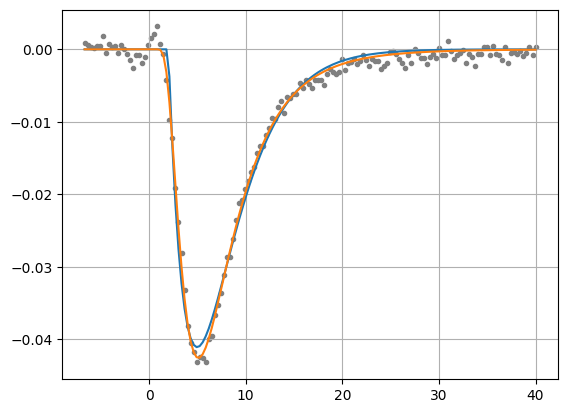

In [9]:
fig, axe = plt.subplots()
axe.scatter(x, y, marker=".", color="gray")
axe.plot(x, model(x, *popt))
axe.plot(x, model2(x, *popt2))
#axe.plot(x, model3(x, *popt3))
axe.grid()

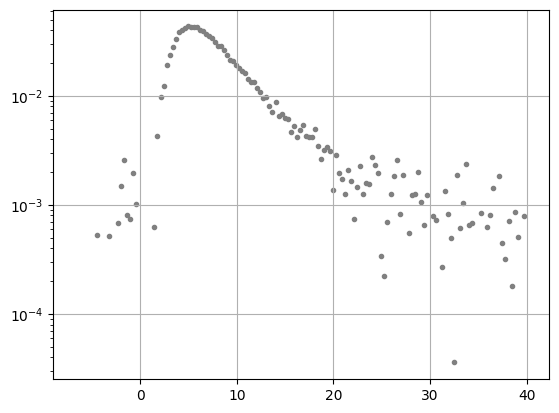

In [10]:
fig, axe = plt.subplots()
axe.scatter(x, -y, marker=".", color="gray")
#axe.set_xscale("log")
axe.set_yscale("log")
axe.grid()

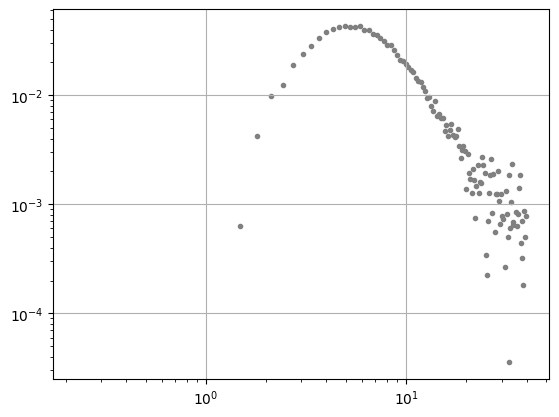

In [11]:
fig, axe = plt.subplots()
axe.scatter(x, -y, marker=".", color="gray")
axe.set_xscale("log")
axe.set_yscale("log")
axe.grid()

In [12]:
xlin = np.linspace(0, 40, 200)

In [13]:
popt

array([ 35.21581996,   2.96481364, -35.06866528,   2.98333221])

In [14]:
ylin = - model(xlin, *[10, 2, -10, 2.1])

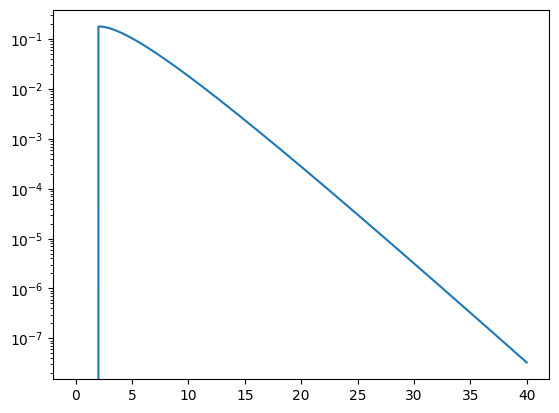

In [15]:
fig, axe = plt.subplots()
axe.semilogy(xlin, ylin)